## Problem Statement:
Flight ticket prices can be something hard to guess, today we might see a price, check out the price of the same flight tomorrow, it will be a different story. We might have often heard travellers saying that flight ticket prices are so unpredictable. Here you will be provided with prices of flight tickets for various airlines between the months of March and June of 2019 and between various cities.



**Size of training set: 10683 records**

**Size of test set: 2671 records**

#### FEATURES:
Airline: The name of the airline.

Date_of_Journey: The date of the journey

Source: The source from which the service begins.

Destination: The destination where the service ends.

Route: The route taken by the flight to reach the destination.

Dep_Time: The time when the journey starts from the source.

Arrival_Time: Time of arrival at the destination.

Duration: Total duration of the flight.

Total_Stops: Total stops between the source and destination.

Additional_Info: Additional information about the flight

Price: The price of the ticket

In [1]:
#importing the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [96]:
#importing dataset
data= pd.read_excel('Flight_Ticket_Participant_Datasets/Data_Train.xlsx')
data

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302
...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,9/04/2019,Kolkata,Banglore,CCU → BLR,19:55,22:25,2h 30m,non-stop,No info,4107
10679,Air India,27/04/2019,Kolkata,Banglore,CCU → BLR,20:45,23:20,2h 35m,non-stop,No info,4145
10680,Jet Airways,27/04/2019,Banglore,Delhi,BLR → DEL,08:20,11:20,3h,non-stop,No info,7229
10681,Vistara,01/03/2019,Banglore,New Delhi,BLR → DEL,11:30,14:10,2h 40m,non-stop,No info,12648


In [97]:
#shape of the dataset
data.shape

(10683, 11)

In [98]:
#checking the datatypes
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


- There are around 10683 observation(rows) and 10 features and 1 target variable.
- Categorical variables need to be encoded.

In [99]:
#lets neglect if there's any duplicates of observation
data.drop_duplicates(inplace=True)
data.shape

(10463, 11)

The duplicates have been removed. Thus there will be no bias in the dataset.

In [100]:
#checking if there's any missing values
data.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

There are some missing values which are minimal. It is prefered to remove those 2 observation from the dataset since we have large number of observation in the dataset.

In [101]:
data.dropna(inplace=True)
data.shape

(10462, 11)

In [102]:
#rechecking
data.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
dtype: int64

The null values have been removed. we now will understand the the relationship with the feautres of the dataset.

In [103]:
#Descriptive statistics
data.describe(include='all')

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
count,10462,10462,10462,10462,10462,10462,10462,10462,10462,10462,10462.000000
unique,12,44,5,6,128,222,1343,368,5,10,NaN
top,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,18:55,19:00,2h 50m,1 stop,No info,NaN
freq,3700,490,4345,4345,2376,233,412,544,5625,8182,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9026.790289
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4624.849541
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1759.000000
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5224.000000
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8266.000000
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12344.750000


- There are a total of 12 Airlines in the dataset.
- 5 departure states and 6 destinations where the flights travel.
- price of the ticket range from 10k to 80K.
- Route actualy says the route and stops taken from one place to other which is already in total stops column thus dropping it.
- Additional column has No Info & No info which is same we need to change that

In [104]:
#dropping the route column
data.drop(columns='Route',inplace=True)

#replacing the no info value so it is not biased
data['Additional_Info'].replace({"No info": 'No Info'},inplace = True)

In [142]:
#converting the dates,depature time, arrival time and Duration from 
#object to pandas datetime and convert them to int and create columns for min hours for each variable

df= data.copy()
#date of journey
df["Journey_day"] = pd.to_datetime(df.Date_of_Journey).dt.day
df["Journey_month"] = pd.to_datetime(df["Date_of_Journey"]).dt.month
#departure time
df["Dep_hour"] = pd.to_datetime(df["Dep_Time"]).dt.hour
df["Dep_min"] = pd.to_datetime(df["Dep_Time"]).dt.minute
#arrival time
df["Arrival_hour"] = pd.to_datetime(df.Arrival_Time).dt.hour
df["Arrival_min"] = pd.to_datetime(df.Arrival_Time).dt.minute
#duration
df['Dur_hour']=df['Duration'].str.split(' ').str[0].str.split('h').str[0]
df.drop(df[df.Dur_hour=='5m'].index,inplace=True)
df.Dur_hour=df.Dur_hour.astype(int)
df['Dur_min']=df['Duration'].str.split(' ').str[1].str.split('m').str[0]
df.Dur_min=df.Dur_min.fillna(0).astype(int)
df['Duration_min']= (df.Dur_hour*60)+df.Dur_min

df.drop(columns="Date_of_Journey",inplace = True)
df.drop(columns="Dep_Time",inplace = True)
df.drop(columns="Arrival_Time",inplace = True)
df.drop(columns=["Duration","Dur_min","Dur_hour"],inplace = True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10461 entries, 0 to 10682
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10461 non-null  object
 1   Source           10461 non-null  object
 2   Destination      10461 non-null  object
 3   Total_Stops      10461 non-null  object
 4   Additional_Info  10461 non-null  object
 5   Price            10461 non-null  int64 
 6   Journey_day      10461 non-null  int64 
 7   Journey_month    10461 non-null  int64 
 8   Dep_hour         10461 non-null  int64 
 9   Dep_min          10461 non-null  int64 
 10  Arrival_hour     10461 non-null  int64 
 11  Arrival_min      10461 non-null  int64 
 12  Duration_min     10461 non-null  int32 
dtypes: int32(1), int64(7), object(5)
memory usage: 1.1+ MB


Jet Airways                          3700
IndiGo                               2043
Air India                            1693
Multiple carriers                    1196
SpiceJet                              815
Vistara                               478
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: Airline, dtype: int64


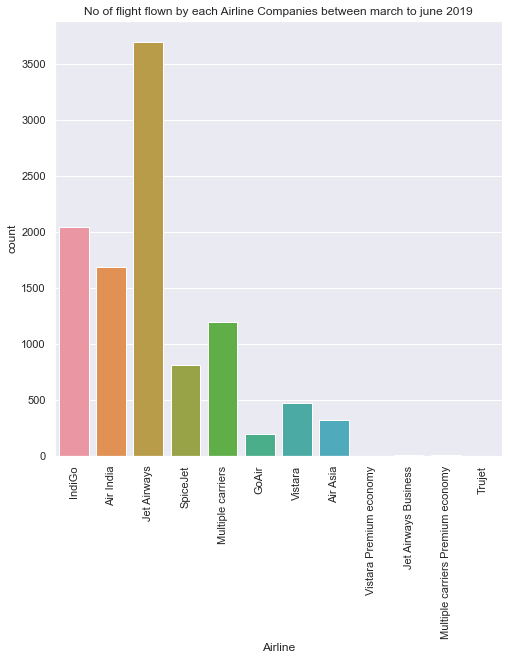

In [143]:
#visualising the individual features to understand the pattern
#categorical variables
plt.figure(figsize=(8,8),facecolor='white')
print(df.Airline.value_counts())
sns.countplot(x='Airline',data=df)
plt.title('No of flight flown by each Airline Companies between march to june 2019')
plt.xticks(rotation=90)
plt.show()

Delhi       4345
Kolkata     2860
Banglore    2179
Mumbai       696
Chennai      381
Name: Source, dtype: int64


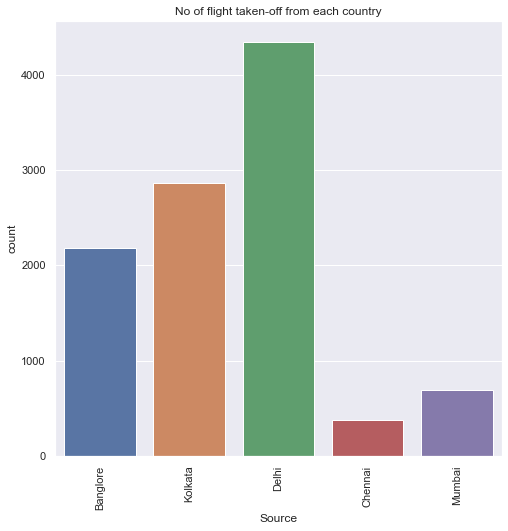

In [144]:
plt.figure(figsize=(8,8),facecolor='white')
print(df.Source.value_counts())
sns.countplot(x='Source',data=df)
plt.title('No of flight taken-off from each country')
plt.xticks(rotation=90)
plt.show()

Cochin       4345
Banglore     2860
Delhi        1265
New Delhi     914
Hyderabad     696
Kolkata       381
Name: Destination, dtype: int64


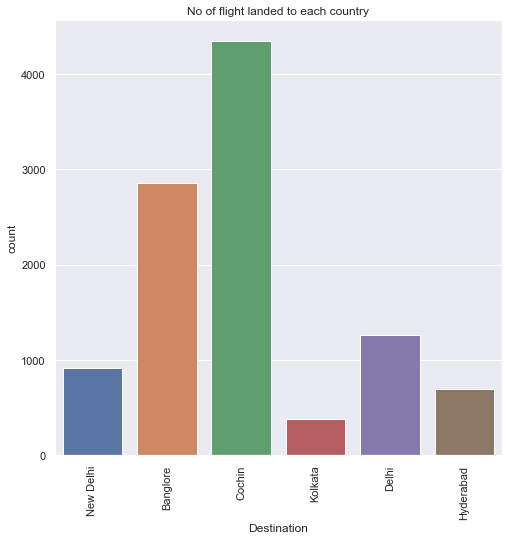

In [145]:
plt.figure(figsize=(8,8),facecolor='white')
print(df.Destination.value_counts())
sns.countplot(x='Destination',data=df)
plt.title('No of flight landed to each country')
plt.xticks(rotation=90)
plt.show()

1 stop      5625
non-stop    3475
2 stops     1317
3 stops       43
4 stops        1
Name: Total_Stops, dtype: int64


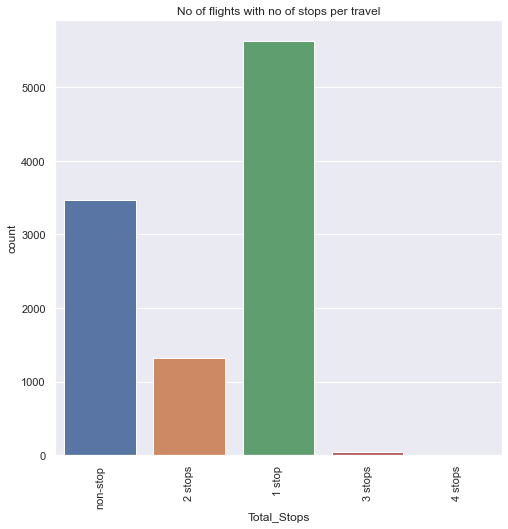

In [146]:
plt.figure(figsize=(8,8),facecolor='white')
print(df.Total_Stops.value_counts())
sns.countplot(x='Total_Stops',data=df)
plt.title('No of flights with no of stops per travel')
plt.xticks(rotation=90)
plt.show()

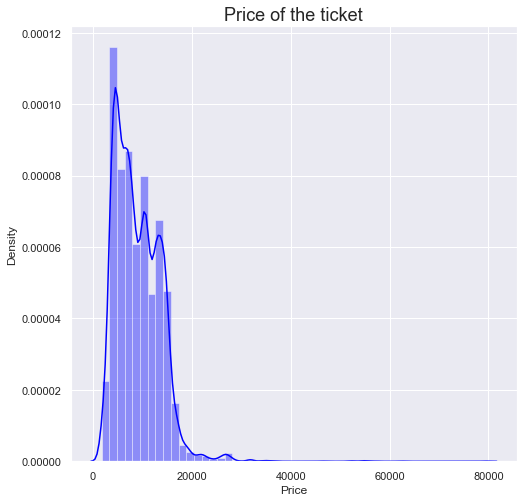

In [147]:
#data distribution of numerical variables 
plt.figure(figsize=(8,8),facecolor='white')
sns.distplot(df.Price,color='Blue')
plt.title("Price of the ticket",fontsize=18)
plt.show()

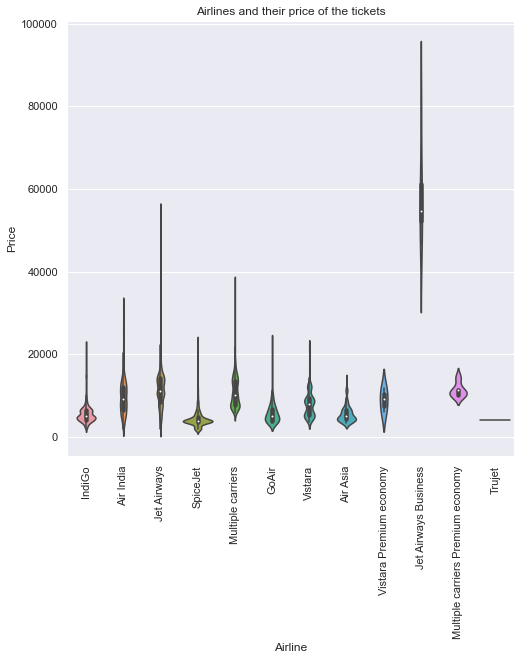

In [148]:
plt.figure(figsize=(8,8),facecolor='white')
sns.violinplot(x='Airline',y='Price',data=df)
plt.title('Airlines and their price of the tickets')
plt.xticks(rotation=90)
plt.show()

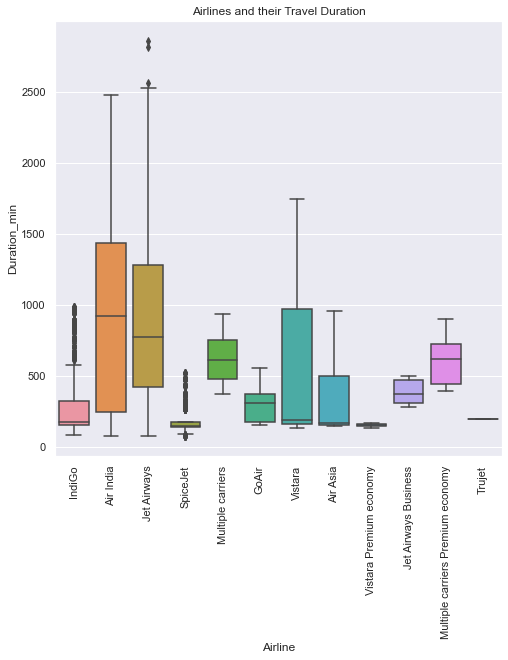

In [149]:
plt.figure(figsize=(8,8),facecolor='white')
sns.boxplot(x='Airline',y='Duration_min',data=df)
plt.title('Airlines and their Travel Duration')
plt.xticks(rotation=90)
plt.show()

In [150]:
df.Total_Stops.unique()

array(['non-stop', '2 stops', '1 stop', '3 stops', '4 stops'],
      dtype=object)

In [151]:
#converting the categorical datas to numerical data
dummies= pd.get_dummies(df[['Airline','Source','Destination','Additional_Info']],drop_first=True)
df.Total_Stops.replace({"non-stop": 0, "1 stop": 1, "2 stops": 2, "3 stops": 3, "4 stops": 4}, inplace = True)

df= pd.concat([df,dummies],axis=1)
df.drop(columns=['Airline','Source','Destination','Additional_Info'],inplace=True)
df

,Total_Stops,Price,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_min,Airline_Air India,...,Destination_Kolkata,Destination_New Delhi,Additional_Info_1 Short layover,Additional_Info_2 Long layover,Additional_Info_Business class,Additional_Info_Change airports,Additional_Info_In-flight meal not included,Additional_Info_No Info,Additional_Info_No check-in baggage included,Additional_Info_Red-eye flight
0,0,3897,24,3,22,20,1,10,170,0,...,0,1,0,0,0,0,0,1,0,0
1,2,7662,5,1,5,50,13,15,445,1,...,0,0,0,0,0,0,0,1,0,0
2,2,13882,6,9,9,25,4,25,1140,0,...,0,0,0,0,0,0,0,1,0,0
3,1,6218,5,12,18,5,23,30,325,0,...,0,0,0,0,0,0,0,1,0,0
4,1,13302,3,1,16,50,21,35,285,0,...,0,1,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,0,4107,4,9,19,55,22,25,150,0,...,0,0,0,0,0,0,0,1,0,0
10679,0,4145,27,4,20,45,23,20,155,1,...,0,0,0,0,0,0,0,1,0,0
10680,0,7229,27,4,8,20,11,20,180,0,...,0,0,0,0,0,0,0,1,0,0
10681,0,12648,3,1,11,30,14,10,160,0,...,0,1,0,0,0,0,0,1,0,0


**Model creation**

In [152]:
#splitting the features and target variables.
x= df.drop(columns='Price')
y= df.Price

In [153]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.metrics import r2_score,mean_squared_error

In [154]:
#splitting the dataset into train and test
x_train,x_test,y_train,y_test= train_test_split(x,y,test_size=0.2,random_state=49)

In [156]:
#best cross fold value
lf= LinearRegression()
for j in range(2,10):
    cvs= cross_val_score(lf,x,y,cv=j)
    cvs_mean= cvs.mean()
    print(f'At cross fold {j} cross value score is {cvs_mean}')

At cross fold 2 cross value score is 0.6805777691497585
At cross fold 3 cross value score is 0.6826965144830254
At cross fold 4 cross value score is 0.6834242300152592
At cross fold 5 cross value score is 0.6829507793279994
At cross fold 6 cross value score is 0.6831491170960078
At cross fold 7 cross value score is 0.6833169155535757
At cross fold 8 cross value score is 0.6829068314926247
At cross fold 9 cross value score is 0.6823817380373995


In [157]:
#LinearRegression

lr= LinearRegression()
lr.fit(x_train,y_train)
y_pred=lr.predict(x_test)

#cross valuation
cvs= cross_val_score(lr,x,y,cv=7)
cvs_mean= cvs.mean()

print('R2 score',r2_score(y_test,y_pred))
print('cross valuation mean for cross fold 7 is',cvs_mean)
print('Mean Squared Error',mean_squared_error(y_test,y_pred))

R2 score 0.6819300759652551
cross valuation mean for cross fold 7 is 0.6833169155535757
Mean Squared Error 7167805.216860426


In [158]:
#lasso model for reglularization
from sklearn.linear_model import Lasso,LassoCV
lassocv= LassoCV()
lassocv.fit(x_train,y_train)
print('alpha value:',lassocv.alpha_)
ls= Lasso(alpha=lassocv.alpha_)
ls.fit(x_train,y_train)
y_lspred= ls.predict(x_test)

#cross valuation
cvs= cross_val_score(lassocv,x,y,cv=7)
cvs_mean= cvs.mean()

print('R2 score',r2_score(y_test,y_lspred))
print('cross valuation mean for cross fold 7 is',cvs_mean)
print('Mean squared error',mean_squared_error(y_test,y_lspred))

alpha value: 1178.4593752055032
R2 score 0.24495042672060585
cross valuation mean for cross fold 7 is 0.2758347843860285
Mean squared error 17015278.28122814


In [159]:
#DecisionTreeRegressor
from sklearn.tree import DecisionTreeRegressor

dt= DecisionTreeRegressor()
dt.fit(x_train,y_train)
y_pred=dt.predict(x_test)

#cross valuation
cvs= cross_val_score(dt,x,y,cv=7)
cvs_mean= cvs.mean()

print('R2 score',r2_score(y_test,y_pred))
print('cross valuation mean for cross fold 7 is',cvs_mean)
print('Mean Squared Error',mean_squared_error(y_test,y_pred))

R2 score 0.8059116404635019
cross valuation mean for cross fold 7 is 0.8279773979658075
Mean Squared Error 4373841.884734831


In [160]:
#RandomForestRegressor
from sklearn.ensemble import RandomForestRegressor

rf= RandomForestRegressor()
rf.fit(x_train,y_train)
y_pred=rf.predict(x_test)

#cross valuation
cvs= cross_val_score(rf,x,y,cv=7)
cvs_mean= cvs.mean()

print('R2 score',r2_score(y_test,y_pred))
print('cross valuation mean for cross fold 7 is',cvs_mean)
print('Mean Squared Error',mean_squared_error(y_test,y_pred))

R2 score 0.8664969271054489
cross valuation mean for cross fold 7 is 0.8902894336376627
Mean Squared Error 3008533.5017589703


In [161]:
#GradientBoostingRegressor
from sklearn.ensemble import GradientBoostingRegressor

gbr= GradientBoostingRegressor()
gbr.fit(x_train,y_train)
y_pred=gbr.predict(x_test)

#cross valuation
cvs= cross_val_score(gbr,x,y,cv=7)
cvs_mean= cvs.mean()

print('R2 score',r2_score(y_test,y_pred))
print('cross valuation mean for cross fold 7 is',cvs_mean)
print('Mean Squared Error',mean_squared_error(y_test,y_pred))

R2 score 0.821322564622905
cross valuation mean for cross fold 7 is 0.8221317941961309
Mean Squared Error 4026551.888921385


In [162]:
#xgboost
import xgboost 

xgb= xgboost.XGBRegressor()
xgb.fit(x_train,y_train)
y_pred=xgb.predict(x_test)

#cross valuation
cvs= cross_val_score(xgb,x,y,cv=7)
cvs_mean= cvs.mean()

print('R2 score',r2_score(y_test,y_pred))
print('cross valuation mean for cross fold 7 is',cvs_mean)
print('Mean Squared Error',mean_squared_error(y_test,y_pred))

R2 score 0.8655615259266336
cross valuation mean for cross fold 7 is 0.8950986062664104
Mean Squared Error 3029613.059877258


**The RandomForestRegressor Model gives accuracy score of 87%, thus selecting this model.**

In [178]:
#hyperparameter tuning for Randomforest
from sklearn.model_selection import GridSearchCV

rf= RandomForestRegressor()
param= {'n_estimators':[10,100,200,500],
        'criterion':["mse", "mae"],
        'max_depth':[7,10,13,15,20],
        'min_samples_split':[2,3,4,5,7,10],
        'min_samples_leaf':[1,2,3,5,7,10]}

search= GridSearchCV(rf,param_grid=param)
search.fit(x_train,y_train)

rf= search.best_estimator_
rf.fit(x_train,y_train)
print(f'our model fits {(rf.score(x_train,y_train))*100}% of the dataset')
y_pred=rf.predict(x_test)

#cross valuation
cvs= cross_val_score(rf,x,y,cv=7)
cvs_mean= cvs.mean()

print(f'our r2 score is {(r2_score(y_test,y_pred)*100)}%')
print('cross valuation mean for cross fold 7 is',cvs_mean)

our model fits 97.1574057081496% of the dataset
our r2 score is 87.32987502721178%
cross valuation mean for cross fold 7 is 0.8903386993428033


Model predicgting score has been improved to 88% with cross validation mean score of 89%.Lets save the model.

In [180]:
#saving the model
import pickle
pickle.dump(rf,open('Flight_ticket_prediction.pkl','wb'))